In [1]:
import sys
import os 

os.environ["CONFIG_PATHS"] = "../../configs/small_model.yaml"
os.environ["CONFIG_OVERRIDES"] = 'game.moves_directory="../../data/moves_10"'
sys.path.append("../../src")

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

from analysis import load_events, filter_events

In [2]:
events = load_events("../../data/2024-11-23_22-31-06-arena-for-doublehandedness-vs-overbragging/logs_2024-11-23_23-07-06_428740.txt")

Start time: 1732430587.091559


In [3]:
for event in events:
    if event.name == "loaded_model":
        print(event.params)

{'model_name': '2024-11-22_09-47-50_646610'}
{'model_name': '2024-11-22_07-34-06_498653'}
{'model_name': '000476496'}
{'model_name': '000361028'}


In [4]:
game_result_events = filter_events(events, "game_result")
game_results = [event.params for event in game_result_events]

players = set()
for game_result in game_results:
    for player, _ in game_result:
        players.add(player)

print(len(game_results))

1263


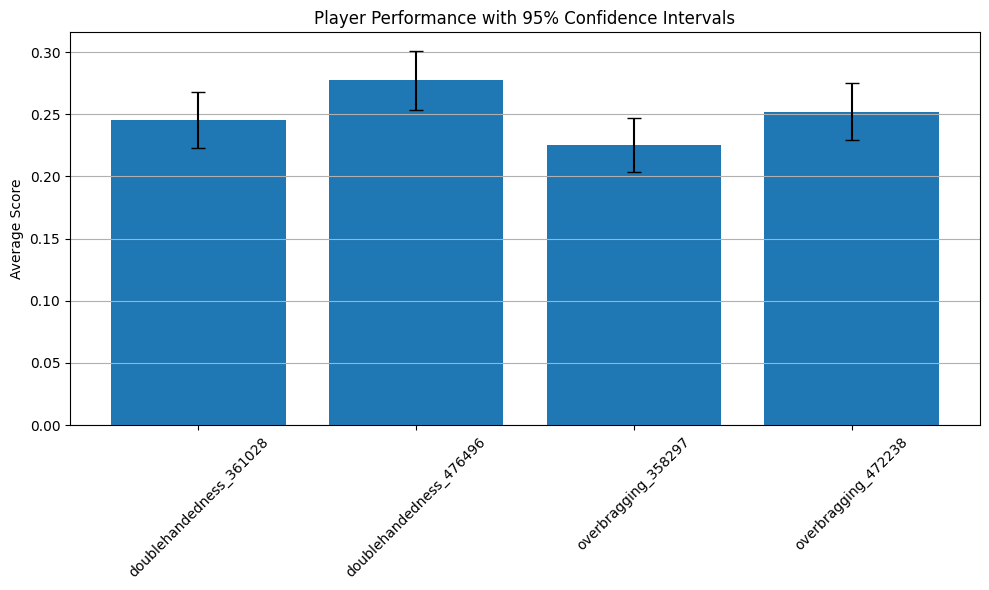

In [5]:
player_results = {}
total_results = {}
for game_result in game_results:
    for player, result in game_result:
        total_results[player] = total_results.get(player, 0) + result
        player_results[player] = player_results.get(player, []) + [result]

player_average = {}
sum_of_total_results = sum(total_results.values())
for player in total_results:
    player_average[player] = total_results[player] / sum_of_total_results

player_error_range = {}
for player in player_results:
    std = np.std(player_results[player]) / np.sqrt(len(player_results[player]))
    player_error_range[player] = 1.96 * std


plt.figure(figsize=(10, 6))

sorted_players = sorted(player_average.items(), key=lambda x: x[0])
players = [p[0] for p in sorted_players]
averages = [player_average[p] for p in players]
errors = [player_error_range[p] for p in players]

plt.bar(players, averages, yerr=errors, capsize=5)
plt.title("Player Performance with 95% Confidence Intervals")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [6]:
# elos = [{player: 1000 for player in players}]

# elo_K = 10.0
# elo_base = 400.0

# for game_result in game_results:
#     latest_elo = elos[-1].copy()

#     game_players = [player_name for player_name, _ in game_result]
#     Q_player = [10 ** (latest_elo[player] / elo_base) for player in game_players]
#     Q_total = sum(Q_player)
#     E_player = [Q / Q_total for Q in Q_player]

#     for i, (player, result) in enumerate(game_result):
#         latest_elo[player] += elo_K * (result - E_player[i])

#     elos.append(latest_elo)

# # Extract player names from the first dictionary in elos
# player_names = elos[0].keys()

# # Prepare data for plotting
# elo_history = {player: [] for player in player_names}

# # Populate elo_history with ELO ratings over time
# for elo_snapshot in elos:
#     for player in player_names:
#         elo_history[player].append(elo_snapshot[player])

# # Plot ELO ratings for each player
# plt.figure(figsize=(10, 6))
# for player, history in elo_history.items():
#     plt.plot(history, label=player)

# plt.title("ELO Ratings Over Time")
# plt.xlabel("Game Number")
# plt.ylabel("ELO Rating")
# plt.legend()
# plt.grid(True)
# plt.show()
